# Convolutional Neural Network

*** code adapted from Deep Learning A-Z Hands On Artificial Neural Networks - Udemy ***

#### Dataset Source: https://www.kaggle.com/c/dogs-vs-cats/data

### Importing the libraries

In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
tf.__version__

'2.1.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [25]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [26]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [38]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [39]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [40]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [41]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [42]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [43]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [44]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [45]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [66]:
(3*3*32+1)*32

9248

In [67]:
(6272+1)*128

802944

In [68]:
(128+1)*1

129

In [46]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

### Training the CNN on the Training set and evaluating it on the Test set

In [51]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 4)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 63 steps
Epoch 1/4
250/250 [==============================] - 47s 187ms/step - loss: 0.6573 - accuracy: 0.6043 - val_loss: 0.6007 - val_accuracy: 0.6865
Epoch 2/4
250/250 [==============================] - 43s 174ms/step - loss: 0.5967 - accuracy: 0.6768 - val_loss: 0.5511 - val_accuracy: 0.7255
Epoch 3/4
250/250 [==============================] - 49s 194ms/step - loss: 0.5422 - accuracy: 0.7283 - val_loss: 0.5295 - val_accuracy: 0.7435
Epoch 4/4
250/250 [==============================] - 43s 170ms/step - loss: 0.5127 - accuracy: 0.7455 - val_loss: 0.5303 - val_accuracy: 0.7510


## Part 4 - Making a single prediction

In [59]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

In [60]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)

In [61]:
print(prediction)

dog


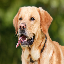

In [64]:
image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))

In [20]:
#np.expand_dims()